In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import pylab as pl
import math
from sklearn.metrics import accuracy_score

In [3]:
import sklearn as sk
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [4]:
data=pd.read_excel(r'C:\Users\dharu\Documents\Studies\ML\project\data.xlsx')

In [5]:
data

,Unnamed: 0,Area_name,Rural_urban_continuum_code_2013,Metro_2013,Civilian_labor_force_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Unemployment_rate_2009,...,Civilian_labor_force_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2017,State
0,0,1,2,1,24383,3.3,24687,5.1,24703,9.7,...,25613,5.2,25966,5.1,25972,3.9,25957,3.6,121.10000,2
1,1,2,3,1,82659,3.1,83223,4.6,82451,9.8,...,87741,5.5,90670,5.3,92090,4.1,93849,3.6,117.50000,2
2,2,3,6,0,10334,6.3,10161,8.8,10003,14.3,...,8613,8.9,8417,8.3,8317,5.8,8373,5.2,67.40000,2
3,3,4,1,1,8791,4.1,8749,5.8,8742,13.3,...,8576,6.6,8623,6.4,8550,4.4,8661,4.0,95.00000,2
4,4,5,1,1,26629,3.2,26698,4.7,26480,10.0,...,24485,5.4,24623,5.4,24725,4.0,25006,3.5,100.10000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3217,3218,1,1,21115,12.6,20372,13.2,19955,17.6,...,13818,13.7,13722,13.9,13409,12.4,13199,10.4,89.10405,27
3210,3218,3219,7,0,3317,10.9,3214,12.5,3124,22.4,...,3194,11.3,3257,10.6,3026,14.5,2734,16.5,89.10405,27
3211,3219,3220,2,1,9479,13.3,9324,13.8,9518,19.9,...,7801,19.7,7808,20.2,7554,19.4,7329,15.9,89.10405,27
3212,3220,3221,1,1,11425,18.2,10904,18.1,10816,23.2,...,9196,17.4,9073,16.9,8996,16.5,8826,14.3,89.10405,27


In [6]:
data.isnull().sum()

Unnamed: 0                                   0
Area_name                                    0
Rural_urban_continuum_code_2013              0
Metro_2013                                   0
 Civilian_labor_force_2007                   0
Unemployment_rate_2007                       0
 Civilian_labor_force_2008                   0
Unemployment_rate_2008                       0
Civilian_labor_force_2009                    0
Unemployment_rate_2009                       0
 Civilian_labor_force_2010                   0
Unemployment_rate_2010                       0
 Civilian_labor_force_2011                   0
Unemployment_rate_2011                       0
 Civilian_labor_force_2012                   0
Unemployment_rate_2012                       0
 Civilian_labor_force_2013                   0
Unemployment_rate_2013                       0
 Civilian_labor_force_2014                   0
Unemployment_rate_2014                       0
 Civilian_labor_force_2015                   0
Unemployment_

In [7]:
data.describe()

,Unnamed: 0,Area_name,Rural_urban_continuum_code_2013,Metro_2013,Civilian_labor_force_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Unemployment_rate_2009,...,Civilian_labor_force_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2017,State
count,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3214.000000,3.214000e+03,3214.000000,3.214000e+03,3214.000000,...,3.214000e+03,3214.000000,3.214000e+03,3214.000000,3.214000e+03,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000
mean,1614.286559,1615.286559,4.932172,0.383945,4.778207e+04,5.066957,4.825767e+04,6.003267,4.826385e+04,9.262414,...,4.915344e+04,5.742688,4.972524e+04,5.440386,5.020621e+04,4.795893,5.062764e+04,4.294337,89.104050,27.693528
std,928.306880,928.306880,2.721953,0.486421,1.534632e+05,2.124130,1.551947e+05,2.381405,1.551052e+05,3.503633,...,1.612365e+05,2.462244,1.633099e+05,2.355342,1.652329e+05,2.172552,1.669489e+05,1.881752,19.818933,14.407254
min,0.000000,1.000000,1.000000,0.000000,4.100000e+01,1.500000,4.300000e+01,1.300000,4.300000e+01,2.100000,...,7.700000e+01,1.800000,8.600000e+01,1.700000,1.000000e+02,1.500000,1.020000e+02,1.300000,39.900000,1.000000
25%,811.250000,812.250000,2.000000,0.000000,5.238500e+03,3.700000,5.282500e+03,4.400000,5.290500e+03,6.800000,...,4.969250e+03,4.200000,4.996000e+03,4.000000,4.972000e+03,3.500000,4.961250e+03,3.100000,76.225000,16.000000
50%,1614.500000,1615.500000,6.000000,0.000000,1.217400e+04,4.700000,1.223150e+04,5.700000,1.214650e+04,8.800000,...,1.139650e+04,5.300000,1.136400e+04,5.000000,1.138400e+04,4.400000,1.142300e+04,3.900000,86.700000,27.000000
75%,2417.750000,2418.750000,7.000000,1.000000,3.145000e+04,5.800000,3.170900e+04,7.100000,3.179125e+04,11.100000,...,3.084825e+04,6.600000,3.092350e+04,6.300000,3.087325e+04,5.400000,3.105225e+04,4.900000,98.400000,42.000000
max,3221.000000,3222.000000,9.000000,1.000000,4.864160e+06,20.400000,4.928959e+06,22.600000,4.914702e+06,27.400000,...,4.989791e+06,24.500000,5.041430e+06,24.100000,5.096516e+06,20.600000,5.136341e+06,19.900000,251.400000,52.000000


In [8]:
data.columns

Index(['Unnamed: 0', 'Area_name', 'Rural_urban_continuum_code_2013',
       'Metro_2013', ' Civilian_labor_force_2007 ', 'Unemployment_rate_2007',
       ' Civilian_labor_force_2008 ', 'Unemployment_rate_2008',
       'Civilian_labor_force_2009', 'Unemployment_rate_2009',
       ' Civilian_labor_force_2010 ', 'Unemployment_rate_2010',
       ' Civilian_labor_force_2011 ', 'Unemployment_rate_2011',
       ' Civilian_labor_force_2012 ', 'Unemployment_rate_2012',
       ' Civilian_labor_force_2013 ', 'Unemployment_rate_2013',
       ' Civilian_labor_force_2014 ', 'Unemployment_rate_2014',
       ' Civilian_labor_force_2015 ', 'Unemployment_rate_2015',
       ' Civilian_labor_force_2016 ', 'Unemployment_rate_2016',
       'Civilian_labor_force_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Unemployment_rate_2018',
       'Med_HH_Income_Percent_of_State_Total_2017', 'State'],
      dtype='object')

In [9]:
new_data=data.drop(['Unnamed: 0',' Civilian_labor_force_2007 ','Metro_2013',' Civilian_labor_force_2008 ','Civilian_labor_force_2009',' Civilian_labor_force_2010 ',' Civilian_labor_force_2011 ',' Civilian_labor_force_2012 ',' Civilian_labor_force_2013 ',' Civilian_labor_force_2014 ',' Civilian_labor_force_2015 ',' Civilian_labor_force_2016 ','Civilian_labor_force_2017','Civilian_labor_force_2018'],axis=1)

In [10]:
new_data

,Area_name,Rural_urban_continuum_code_2013,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2017,State
0,1,2,3.3,5.1,9.7,8.9,8.4,6.9,6.2,5.8,5.2,5.1,3.9,3.6,121.10000,2
1,2,3,3.1,4.6,9.8,10.0,9.0,7.5,6.6,6.1,5.5,5.3,4.1,3.6,117.50000,2
2,3,6,6.3,8.8,14.3,12.3,11.5,11.5,10.2,10.5,8.9,8.3,5.8,5.2,67.40000,2
3,4,1,4.1,5.8,13.3,11.4,10.5,8.5,7.9,7.2,6.6,6.4,4.4,4.0,95.00000,2
4,5,1,3.2,4.7,10.0,9.8,8.7,6.9,6.3,6.1,5.4,5.4,4.0,3.5,100.10000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3218,1,12.6,13.2,17.6,20.8,18.7,16.0,16.5,16.2,13.7,13.9,12.4,10.4,89.10405,27
3210,3219,7,10.9,12.5,22.4,18.6,15.8,12.9,15.9,14.0,11.3,10.6,14.5,16.5,89.10405,27
3211,3220,2,13.3,13.8,19.9,22.0,21.3,20.8,21.6,21.8,19.7,20.2,19.4,15.9,89.10405,27
3212,3221,1,18.2,18.1,23.2,25.4,25.5,23.3,23.9,21.7,17.4,16.9,16.5,14.3,89.10405,27


In [11]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(new_data,test_size=0.2,random_state=33)

In [12]:
y=pd.DataFrame(train['Unemployment_rate_2018'])

In [13]:
y

,Unemployment_rate_2018
2322,3.3
1031,6.6
1407,6.0
1296,7.8
1955,4.8
...,...
2706,3.5
578,2.5
1752,5.7
2439,4.4


In [14]:
x=train

In [15]:
x.columns

Index(['Area_name', 'Rural_urban_continuum_code_2013',
       'Unemployment_rate_2007', 'Unemployment_rate_2008',
       'Unemployment_rate_2009', 'Unemployment_rate_2010',
       'Unemployment_rate_2011', 'Unemployment_rate_2012',
       'Unemployment_rate_2013', 'Unemployment_rate_2014',
       'Unemployment_rate_2015', 'Unemployment_rate_2016',
       'Unemployment_rate_2017', 'Unemployment_rate_2018',
       'Med_HH_Income_Percent_of_State_Total_2017', 'State'],
      dtype='object')

In [16]:
x=x.drop(['Unemployment_rate_2018'],axis=1)

In [17]:
x=np.array(x)

In [18]:
x = np.array([np.concatenate((v,[1])) for v in x])

In [19]:
x

array([[2.331e+03, 6.000e+00, 7.700e+00, ..., 7.670e+01, 4.200e+01,
        1.000e+00],
       [1.040e+03, 2.000e+00, 5.400e+00, ..., 9.660e+01, 1.800e+01,
        1.000e+00],
       [1.416e+03, 7.000e+00, 1.480e+01, ..., 8.270e+01, 2.600e+01,
        1.000e+00],
       ...,
       [1.761e+03, 4.000e+00, 6.500e+00, ..., 8.370e+01, 3.100e+01,
        1.000e+00],
       [2.448e+03, 4.000e+00, 5.500e+00, ..., 8.790e+01, 4.400e+01,
        1.000e+00],
       [3.101e+03, 3.000e+00, 5.900e+00, ..., 1.031e+02, 5.000e+01,
        1.000e+00]])

In [20]:
y=np.array(y)

In [21]:
x

array([[2.331e+03, 6.000e+00, 7.700e+00, ..., 7.670e+01, 4.200e+01,
        1.000e+00],
       [1.040e+03, 2.000e+00, 5.400e+00, ..., 9.660e+01, 1.800e+01,
        1.000e+00],
       [1.416e+03, 7.000e+00, 1.480e+01, ..., 8.270e+01, 2.600e+01,
        1.000e+00],
       ...,
       [1.761e+03, 4.000e+00, 6.500e+00, ..., 8.370e+01, 3.100e+01,
        1.000e+00],
       [2.448e+03, 4.000e+00, 5.500e+00, ..., 8.790e+01, 4.400e+01,
        1.000e+00],
       [3.101e+03, 3.000e+00, 5.900e+00, ..., 1.031e+02, 5.000e+01,
        1.000e+00]])

In [22]:
np.set_printoptions(precision=3, linewidth=120, suppress=True, edgeitems=7)

In [23]:
linreg=LinearRegression()

In [24]:
x.shape

(2571, 16)

In [25]:
y.shape

(2571, 1)

In [26]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
linreg.score(x,y)

0.955822538089255

In [28]:
for i in range(len(y)):
    pred = linreg.predict(np.array([x[i]]))[0]
    print(pred)

[3.966]
[6.461]
[6.364]
[7.83]
[5.069]
[2.411]
[4.259]
[5.198]
[2.286]
[4.035]
[3.608]
[3.944]
[5.829]
[6.581]
[4.224]
[4.431]
[5.537]
[4.127]
[2.212]
[3.072]
[5.842]
[3.796]
[4.584]
[3.483]
[5.166]
[6.223]
[4.539]
[6.134]
[2.244]
[2.845]
[3.644]
[3.549]
[2.798]
[3.35]
[4.814]
[3.82]
[3.732]
[4.914]
[3.041]
[1.824]
[3.58]
[4.817]
[5.262]
[5.365]
[4.632]
[3.842]
[4.983]
[4.301]
[3.397]
[5.13]
[3.882]
[10.679]
[3.581]
[2.956]
[3.576]
[4.736]
[3.773]
[4.608]
[4.036]
[2.951]
[3.874]
[6.961]
[3.805]
[5.173]
[4.476]
[6.729]
[2.577]
[4.595]
[4.386]
[2.497]
[3.832]
[3.282]
[2.994]
[3.292]
[4.251]
[3.8]
[2.928]
[2.979]
[2.668]
[3.052]
[3.881]
[2.97]
[4.06]
[3.715]
[2.514]
[4.457]
[6.016]
[6.028]
[3.627]
[3.356]
[3.185]
[3.649]
[4.419]
[3.698]
[3.064]
[17.728]
[3.596]
[3.149]
[2.902]
[3.612]
[2.4]
[15.316]
[4.876]
[3.205]
[6.141]
[4.176]
[2.247]
[3.281]
[2.976]
[5.303]
[4.738]
[7.838]
[3.402]
[4.723]
[2.943]
[3.97]
[7.137]
[3.283]
[4.434]
[5.997]
[3.289]
[7.552]
[4.354]
[6.831]
[2.764]
[6.121]
[

In [29]:
p = linreg.predict(x) # p is the array of predicted values

# Now we can constuct an array of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err)

[[0.666]
 [0.139]
 [0.364]
 [0.03 ]
 [0.269]
 [0.289]
 [0.141]
 ...
 [0.166]
 [0.158]
 [0.21 ]
 [0.167]
 [0.127]
 [0.092]
 [0.033]]


In [30]:
total_error = np.dot(err.T,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  [[0.396]]


In [31]:
print('Linear Regression Intercept',linreg.intercept_)

Linear Regression Intercept [0.011]


In [32]:
print('Linear Regression Coefficient',linreg.coef_)

Linear Regression Coefficient [[-0.     0.017  0.042  0.037 -0.043  0.002 -0.06   0.081  0.013 -0.064  0.21  -0.173  0.832  0.002  0.006  0.   ]]


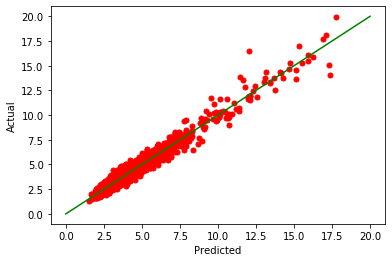

In [33]:
%matplotlib inline
pl.plot(p, y,'ro', markersize=5)
pl.plot([0,20],[0,20], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [34]:
def cross_validate(model,X,y,n,verbose=False):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):    
        model.fit(X[train],y[train])
        p = model.predict(x[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e.T,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [35]:
rmse10=cross_validate(linreg,x,y,10,verbose=True)

Fold  1 RMSE: 0.4170
Fold  2 RMSE: 0.4104
Fold  3 RMSE: 0.4383
Fold  4 RMSE: 0.3848
Fold  5 RMSE: 0.3862
Fold  6 RMSE: 0.3709
Fold  7 RMSE: 0.3901
Fold  8 RMSE: 0.4565
Fold  9 RMSE: 0.4141
Fold 10 RMSE: 0.3723


In [36]:
ridge=Ridge(alpha=20)
ridge.fit(x,y)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [37]:
ridge.score(x,y)

0.9557376865309639

In [38]:
p_r = ridge.predict(x)
err_r = p-y
total_error_r = np.dot(err_r.T,err_r)
rmse_r = np.sqrt(total_error_r/len(p_r))

In [39]:
rmse_r

array([[0.396]])

In [40]:
rmse_10cv_ridge = cross_validate(ridge, x, y, 10, verbose=True)

Fold  1 RMSE: 0.4212
Fold  2 RMSE: 0.4064
Fold  3 RMSE: 0.4319
Fold  4 RMSE: 0.3820
Fold  5 RMSE: 0.3860
Fold  6 RMSE: 0.3712
Fold  7 RMSE: 0.3906
Fold  8 RMSE: 0.4660
Fold  9 RMSE: 0.4120
Fold 10 RMSE: 0.3716


In [74]:
print('Ridge Regression Intercept',ridge.intercept_)

Ridge Regression Intercept [0.143]


In [41]:
print('Ridge Regression Intercept Coefficient',ridge.coef_)

Ridge Regression Intercept Coefficient [[-0.     0.018  0.036  0.044 -0.044 -0.016 -0.036  0.074  0.007 -0.039  0.187 -0.138  0.799  0.002  0.006  0.   ]]


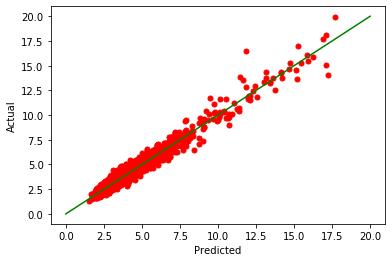

In [42]:
%matplotlib inline
pl.plot(p_r, y,'ro', markersize=5)
pl.plot([0,20],[0,20], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [43]:
en=ElasticNet(alpha=0.5)
en.fit(x,y)


ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
en.score(x,y)

0.9336034828704546

In [45]:
p_en = en.predict(x)


In [46]:
rmse_en = np.sqrt(np.linalg.norm(p_en - y)) / np.sqrt(len(y))
rmse_en

1.5895040552647781

In [47]:
print('Elastic Net Regression Intercept Coefficient',en.coef_)

Elastic Net Regression Intercept Coefficient [ 0.     0.     0.     0.     0.     0.     0.     0.     0.032  0.097  0.063  0.109  0.429 -0.001 -0.     0.   ]


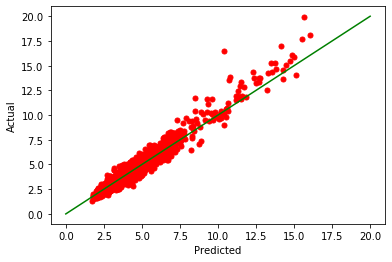

In [48]:
%matplotlib inline
pl.plot(p_en, y,'ro', markersize=5)
pl.plot([0,20],[0,20], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [49]:
lasso=Lasso(alpha=0.5)
lasso.fit(x,y)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
p_la = lasso.predict(x)

In [51]:
rmse_la = np.sqrt(np.linalg.norm(p_la - y)) / np.sqrt(len(y))
rmse_la

1.5743621001614931

In [55]:
lasso.score(x,y)


0.9323435587586455

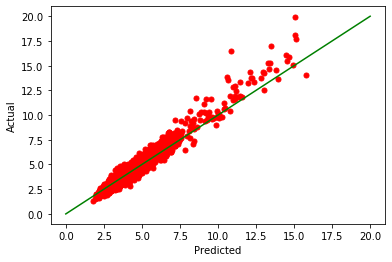

In [52]:
%matplotlib inline
pl.plot(p_la, y,'ro', markersize=5)
pl.plot([0,20],[0,20], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.01, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p_s = sgdreg.predict(x_s)
err_s = p_s-y
total_error_s = np.dot(err_s.T,err_s)
rmse_s = np.sqrt(total_error/len(p_s))
rmse_s


C:\Users\dharu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.396]])

In [54]:
sgdreg.score(x_s,y)

0.9522165276682497

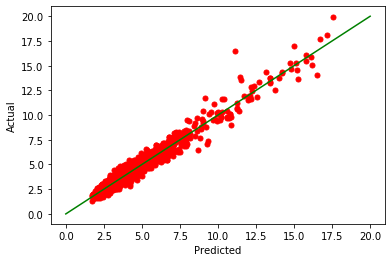

In [65]:
%matplotlib inline
pl.plot(p_s, y,'ro', markersize=5)
pl.plot([0,20],[0,20], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [69]:
print('Comparing Accuracy:')
print('Accuracy for Linear Regression: ',linreg.score(x,y))
print('Accuracy for Ridge Regression: ',ridge.score(x,y))
print('Accuracy for Lasso Regression: ',lasso.score(x,y))
print('Accuracy for Elastic-Net Regression: ',en.score(x,y))
print('Accuracy for Stochastic Gradient Descent Regression: ',sgdreg.score(x_s,y))



Comparing Accuracy:
Accuracy for Linear Regression:  0.953830323005319
Accuracy for Ridge Regression:  0.9557008928914242
Accuracy for Lasso Regression:  0.9323435587586455
Accuracy for Elastic-Net Regression:  0.9336034828704546
Accuracy for Stochastic Gradient Descent Regression:  0.9522165276682497


On Comparing the accuracy, we have higher accuracy in Ridge Regression. So we are going with Ridge regression for our model. Let's do the testing part now.

In [57]:
y_t=pd.DataFrame(test['Unemployment_rate_2018'])

In [58]:
x_t=test

In [59]:
x_t=x_t.drop(['Unemployment_rate_2018'],axis=1)
x_t=np.array(x_t)
x_t = np.array([np.concatenate((v,[1])) for v in x_t])
y_t=np.array(y_t)

In [60]:
y_t.shape

(643, 1)

In [70]:
ridge.fit(x_t,y_t)
ridge.score(x_t,y_t)


0.9584574594320934

In [72]:
p_t = ridge.predict(x_t) # p is the array of predicted values

# Now we can constuct an array of errors
err_t = abs(p_t-y_t)

In [73]:
total_error_t = np.dot(err_t.T,err_t)
rmse_test = np.sqrt(total_error_t/len(p_t))
print("RMSE on Test Data: ", rmse_test)

RMSE on Test Data:  [[0.382]]
